### Step 1 — Load stock data
#### Since we have multiple tickers in yfinance_data, we can merge them into a single DataFrame by date.

In [5]:
import os
print(os.getcwd())

c:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\notebooks


In [6]:
os.chdir(r"C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1")
print(os.getcwd())  # confirm


C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1


In [3]:
import sys
import os

src_path = os.path.join(os.getcwd(), "src")
if src_path not in sys.path:
    sys.path.append(src_path)

print(sys.path)  # confirm src is listed


['C:\\Users\\User\\anaconda3\\python311.zip', 'C:\\Users\\User\\anaconda3\\DLLs', 'C:\\Users\\User\\anaconda3\\Lib', 'C:\\Users\\User\\anaconda3', 'c:\\Users\\User\\Desktop\\KAIM\\week_1\\.venv', '', 'c:\\Users\\User\\Desktop\\KAIM\\week_1\\.venv\\Lib\\site-packages', 'c:\\Users\\User\\Desktop\\KAIM\\week_1\\News-Sentiment-vs-Stock-Movements_Week1\\notebooks\\src']


In [7]:
import sys
src_path = os.path.join(os.getcwd(), "src")
if src_path not in sys.path:
    sys.path.append(src_path)


In [8]:
from data_loader import load_news_data
from data_cleaning import clean_news_data


In [9]:
import os
import sys
import pandas as pd

# Ensure working directory is project root
os.chdir(r"C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1")

# Add src to Python path
src_path = os.path.join(os.getcwd(), "src")
if src_path not in sys.path:
    sys.path.append(src_path)

# Import custom modules
from data_loader import load_news_data
from data_cleaning import clean_news_data


In [16]:
import os
print(os.getcwd())


C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1


In [18]:
from data_loader import load_news_data
from data_cleaning import clean_news_data

# Relative path to your news CSV
news_csv_path = "Data/newsData/raw_analyst_ratings.csv"

# Load raw news data
news_raw = load_news_data(news_csv_path)

# Clean the news data
news_clean = clean_news_data(news_raw)

# Quick check
print(news_clean.head())


   unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  benzinga insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  benzinga insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         lisa levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         lisa levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         vick meyer   

                       date stock  headline_length     pub_day  pub_hour  \
0 2020-06-05 10:30:54-04:00     A               39  2020-06-05  

C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\src\data_cleaning.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["headline"] = df["headline"].astype(str).str.strip()
C:\Users\User\Desktop\KAIM\week_1\News-Sentiment-vs-Stock-Movements_Week1\src\data_cleaning.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publisher"] = df["publisher"].astype(str).str.strip().str.lower()


In [19]:
import pandas as pd
import glob

# Step 1: Load all stock CSVs into a dictionary
stock_files = glob.glob("Data/yfinance_data/*.csv")  # adjust folder if needed
stocks = {}

for f in stock_files:
    ticker = f.split("/")[-1].split(".")[0]  # extract ticker name
    df = pd.read_csv(f, parse_dates=["Date"])  # ensure Date is datetime
    df = df[["Date", "Close"]].copy()          # keep only Date & Close
    df.rename(columns={"Close": "Close_" + ticker}, inplace=True)
    stocks[ticker] = df

# Step 2: Merge all stock data on Date
from functools import reduce
stock_merged = reduce(lambda left, right: pd.merge(left, right, on="Date", how="outer"), stocks.values())
stock_merged.sort_values("Date", inplace=True)

# Step 3: Align news data
news_clean["pub_day"] = pd.to_datetime(news_clean["pub_day"])
aligned_data = pd.merge(news_clean, stock_merged, left_on="pub_day", right_on="Date", how="inner")

# Check
print(aligned_data.head())


   unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  benzinga insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  benzinga insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         lisa levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         lisa levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         vick meyer   

                       date stock  headline_length    pub_day  pub_hour  \
0 2020-06-05 10:30:54-04:00     A               39 2020-06-05    

In [21]:
# Step: Sentiment Analysis on news headlines
from textblob import TextBlob
import pandas as pd

# Assuming news_clean is your cleaned dataframe
# Create a function to compute sentiment
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity  # Returns value between -1 (negative) and +1 (positive)

# Apply sentiment analysis to headlines
news_clean['sentiment'] = news_clean['headline'].apply(get_sentiment)

# Optional: categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0.05:
        return 'positive'
    elif polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

news_clean['sentiment_label'] = news_clean['sentiment'].apply(categorize_sentiment)

# Quick check
print(news_clean[['headline', 'sentiment', 'sentiment_label']].head())


                                            headline  sentiment  \
0            Stocks That Hit 52-Week Highs On Friday        0.0   
1         Stocks That Hit 52-Week Highs On Wednesday        0.0   
2                      71 Biggest Movers From Friday        0.0   
3       46 Stocks Moving In Friday's Mid-Day Session        0.0   
4  B of A Securities Maintains Neutral on Agilent...        0.0   

  sentiment_label  
0         neutral  
1         neutral  
2         neutral  
3         neutral  
4         neutral  


In [25]:
from textblob import TextBlob

def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        label = "positive"
    elif score < 0:
        label = "negative"
    else:
        label = "neutral"
    return score, label

# Apply sentiment
news_clean["sentiment_score"], news_clean["sentiment_label"] = zip(
    *news_clean["headline"].astype(str).apply(get_sentiment)
)

In [26]:
news_clean[["headline", "sentiment_score", "sentiment_label"]].tail()

,headline,sentiment_score,sentiment_label
1407266,Chinese Nano-Cap Momentum Stocks Sharply Highe...,0.046591,positive
1407267,28 Stocks Moving In Wednesday's Pre-Market Ses...,0.000000,neutral
1407268,China Zenix Auto International Reports Q3 EPAD...,0.000000,neutral
1407269,46 Biggest Movers From Yesterday,0.000000,neutral
1407270,42 Stocks Moving In Tuesday's Mid-Day Session,0.000000,neutral


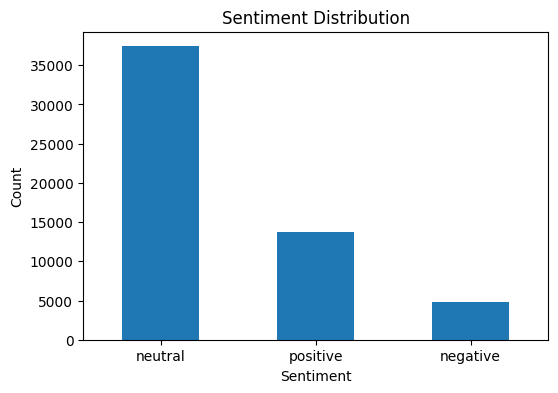

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
news_clean["sentiment_label"].value_counts().plot(kind="bar")

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


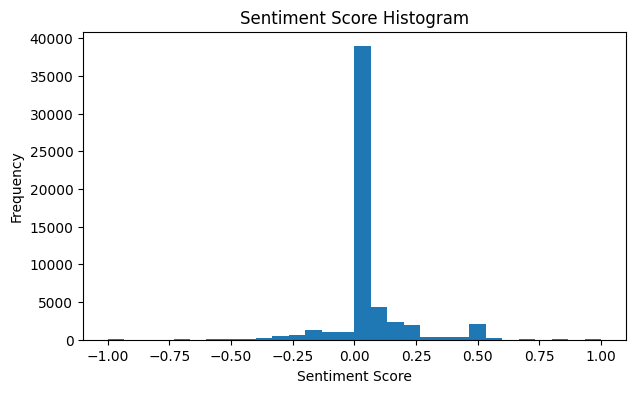

In [28]:
plt.figure(figsize=(7,4))
plt.hist(news_clean["sentiment_score"], bins=30)

plt.title("Sentiment Score Histogram")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


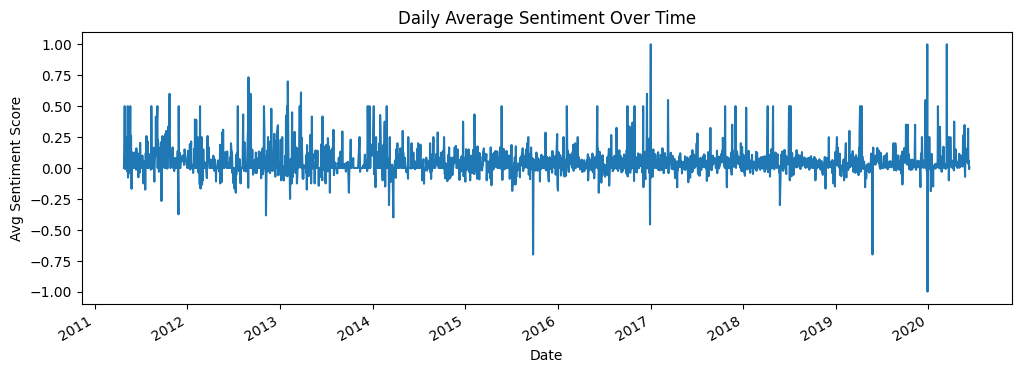

In [29]:
# make sure pub_day is datetime.date (it is from data_cleaning)
daily_sentiment = news_clean.groupby("pub_day")["sentiment_score"].mean()

plt.figure(figsize=(12,4))
daily_sentiment.plot()

plt.title("Daily Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Sentiment Score")
plt.show()


#### Analysis:

In [39]:
# News data
news_csv_path = "../Data/newsData/raw_analyst_ratings.csv"

# YFinance stock CSVs folder
stocks_folder = "../Data/yfinance_data"


In [41]:
import os
print(os.path.exists(stocks_folder))  # Should print True
print(os.listdir(stocks_folder))      # Should list all CSV files


False


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../Data/yfinance_data'

In [40]:
import os
import pandas as pd

# List stock files
stock_files = [f for f in os.listdir(stocks_folder) if f.endswith(".csv")]
print(stock_files)

# Load all stock data
stock_data = {}
for file in stock_files:
    ticker = file.split(".")[0]
    df = pd.read_csv(os.path.join(stocks_folder, file))
    df["ticker"] = ticker
    df["date"] = pd.to_datetime(df["date"])
    stock_data[ticker] = df

# Combine all tickers
stocks_all = pd.concat(stock_data.values(), ignore_index=True)
print(stocks_all.head())


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../Data/yfinance_data'